# KMeans Model - Vote dataset


19:56:34 - src.utils.logger - INFO - 
Loading data

19:56:34 - src.utils.logger - INFO - Data loaded: vote
INFO:src.utils.logger:Data loaded: vote
19:56:34 - src.utils.logger - INFO - Running KMeans on vote dataset
INFO:src.utils.logger:Running KMeans on vote dataset
19:56:34 - src.utils.logger - INFO - 
Tuning hyperparameters

INFO:src.utils.logger:
Tuning hyperparameters



[{'k': 2}, {'k': 3}, {'k': 4}, {'k': 5}, {'k': 6}, {'k': 7}, {'k': 8}, {'k': 9}]
{'k': 2}
{'k': 3}
{'k': 4}
{'k': 5}
{'k': 6}


19:56:35 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:56:35 - src.utils.logger - INFO - Trained with: {'k': 2}
INFO:src.utils.logger:Trained with: {'k': 2}
19:56:35 - src.utils.logger - INFO - 
Evaluating the model

INFO:src.utils.logger:
Evaluating the model

19:56:35 - src.utils.logger - INFO - Scores: {'k': 2, 'n_out_clusters': 2, 'n_in_classes': 2, 'adjusted_rand_score': 0.5709908306848333, 'v_measure_score': 0.4942044986733932, 'homogeneity_score': 0.5030592214480791, 'completeness_score': 0.48565610127351455, 'silhouette_score': 0.35338324245647645, 'calinski_harabasz_score': 290.5112482900722}
INFO:src.utils.logger:Scores: {'k': 2, 'n_out_clusters': 2, 'n_in_classes': 2, 'adjusted_rand_score': 0.5709908306848333, 'v_measure_score': 0.4942044986733932, 'homogeneity_score': 0.5030592214480791, 'completeness_score': 0.48565610127351455, 'silhouette_score': 0.35338324245647645, 'calinski_harabasz_score': 290.5112482900722}
19:56:35 - src.uti

{'k': 7}
{'k': 8}
{'k': 9}
['adjusted_rand_score', 'v_measure_score', 'silhouette_score', 'calinski_harabasz_score']


19:56:35 - src.utils.logger - INFO - Results written in report/vote/KMeans/k_2/23-10-2023_19h-56m-35s
INFO:src.utils.logger:Results written in report/vote/KMeans/k_2/23-10-2023_19h-56m-35s
19:56:35 - src.utils.logger - INFO - 
Done!

INFO:src.utils.logger:
Done!



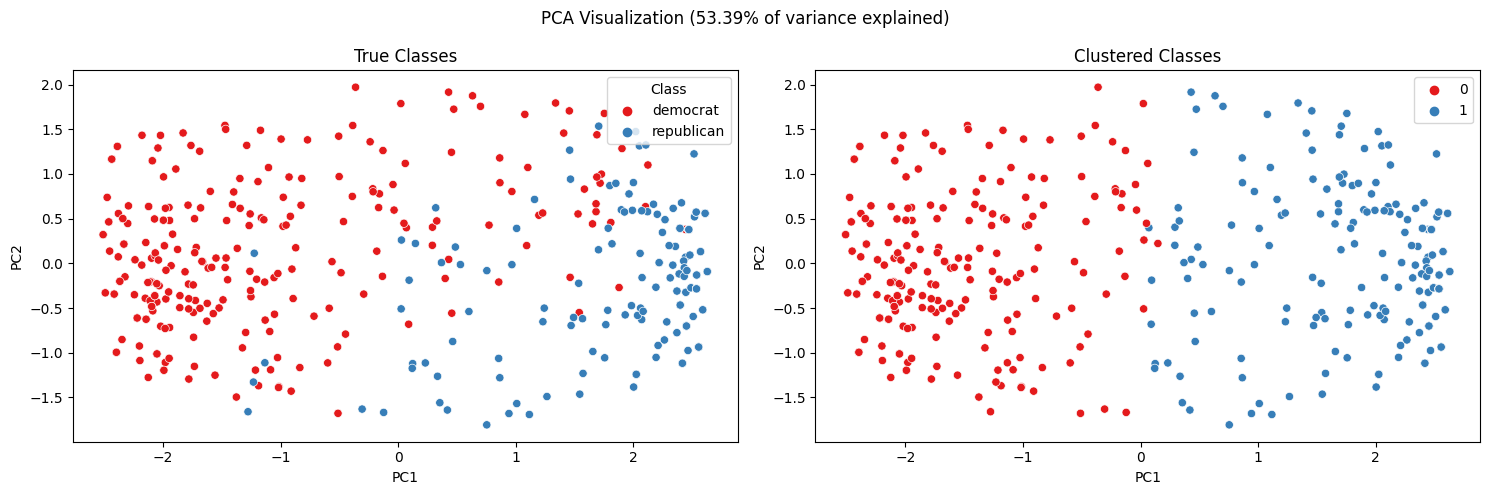

In [1]:
import pandas as pd
from src.trainflow.TrainFlow import TrainFlow
from src.clustering.KMeans import KMeans
from matplotlib import pyplot as plt

ds_name = "vote"
model = KMeans
target = "Class"
ls_metrics = ['adjusted_rand_score', 'v_measure_score', 
                'silhouette_score', 'calinski_harabasz_score']
d_labels = {
    0: 'democrat',
    1: 'republican',
}
output_path = 'report'

tf = TrainFlow(ds_name, model, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf.run()

In [2]:
tf.training_params

{'k': 2}

(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'True Classes'}, xlabel='PC1', ylabel='PC2'>,
        <AxesSubplot:title={'center':'Clustered Classes'}, xlabel='PC1', ylabel='PC2'>],
       dtype=object))

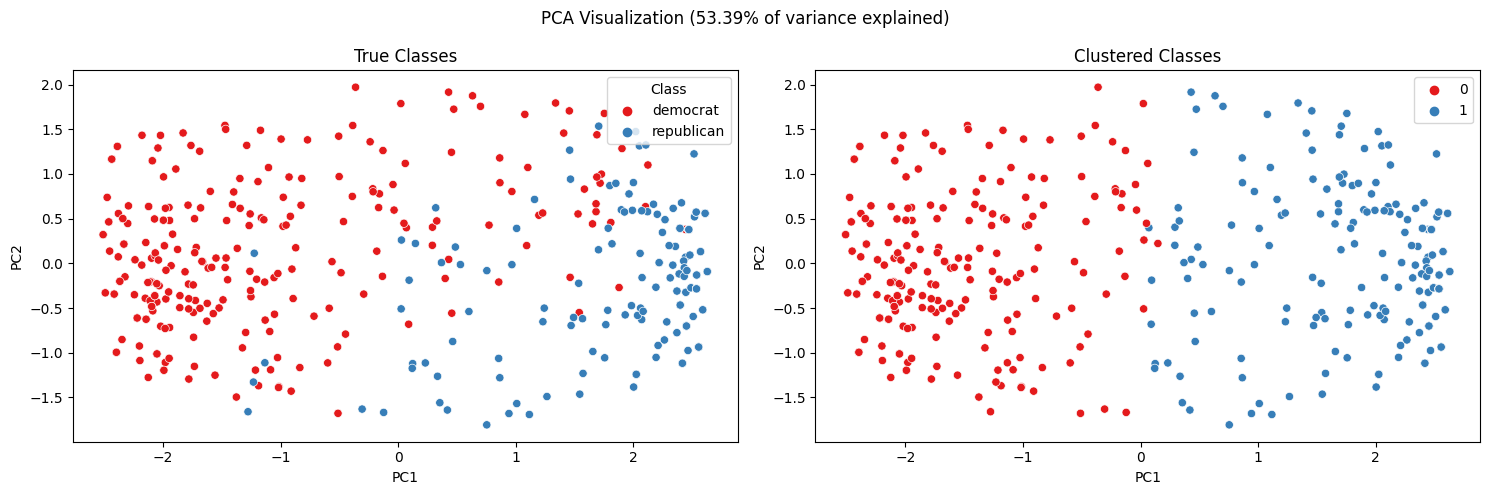

In [3]:

tf.evaluator.plot_scatter_pca_visualization(tf.trained_model.labels_, 
                                            d_classes = d_labels)

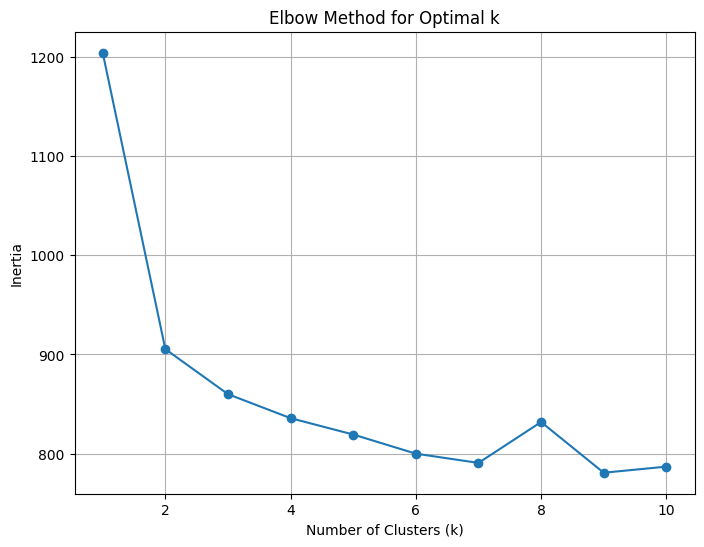

In [4]:
# Elbow method to find the optimal number of clusters (k)
inertia = tf.trained_model.inertia_

# Values of k to try
k_values = range(1, 11)

# List to store the inertias
inertias = []

from src.read.processing import Processing
dataclass = Processing(source_path='input/datasets/')

df = dataclass.read('vote')
dataclass.general_preprocessing()
df = dataclass.df
df = df.iloc[:, :-1]

# Run k-means for different values of k
for k in k_values:
    model = KMeans(k=k, random_state=0)
    model.fit(df)  # Where X is your dataset
    inertias.append(model.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.savefig(f'{tf.output_path_total}/img/vote_elbow_method.png')

plt.show()


In [5]:
tf.df_results

,k,n_out_clusters,n_in_classes,adjusted_rand_score,v_measure_score,homogeneity_score,completeness_score,silhouette_score,calinski_harabasz_score
0,2,2,2,0.570991,0.494204,0.503059,0.485656,0.353383,290.511248
1,3,3,2,0.381617,0.388235,0.508536,0.313963,0.291182,200.873965
2,4,4,2,0.359191,0.398593,0.588314,0.301398,0.229386,155.681427
3,5,5,2,0.355708,0.448656,0.735420,0.322790,0.304556,155.838563
4,6,6,2,0.295450,0.397883,0.704013,0.277302,0.266466,144.719551
6,8,8,2,0.293319,0.390323,0.734586,0.265770,0.295240,186.530789
7,9,9,2,0.287566,0.356774,0.669211,0.243221,0.308886,166.984226
5,7,7,2,0.275928,0.388012,0.719691,0.265605,0.282436,142.138933


In [6]:
import matplotlib.pyplot as plt

19:56:36 - src.utils.logger - INFO - 
Loading data

19:56:36 - src.utils.logger - INFO - 
Loading data

INFO:src.utils.logger:
Loading data

19:56:36 - src.utils.logger - INFO - Data loaded: vote
19:56:36 - src.utils.logger - INFO - Data loaded: vote
INFO:src.utils.logger:Data loaded: vote
19:56:36 - src.utils.logger - INFO - Running KMeans on vote dataset
19:56:36 - src.utils.logger - INFO - Running KMeans on vote dataset
INFO:src.utils.logger:Running KMeans on vote dataset
19:56:36 - src.utils.logger - INFO - 
Training model

19:56:36 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:56:36 - src.utils.logger - INFO - Trained with: {'k': 2}
19:56:36 - src.utils.logger - INFO - Trained with: {'k': 2}
INFO:src.utils.logger:Trained with: {'k': 2}
19:56:36 - src.utils.logger - INFO - 
Evaluating the model

19:56:36 - src.utils.logger - INFO - 
Evaluating the model

INFO:src.utils.logger:
Evaluating the model

19:56:36 - src.utils.logger - INFO - Scores

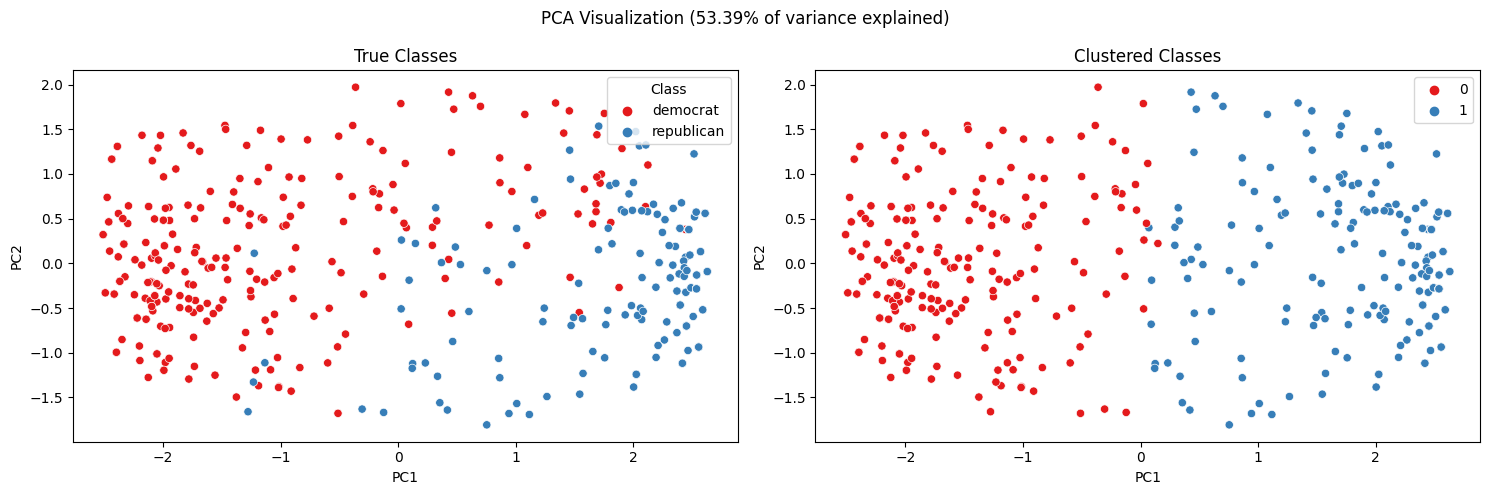

In [7]:
d_hyper = {'k': 2}

new_model = KMeans

tf_bp = TrainFlow(ds_name, new_model, hyperparams=d_hyper, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf_bp.run()